# Adult Salary Prediction 

In [308]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [309]:
salary_data = pd.read_csv('salary_data.csv')
salary_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [310]:
salary_data.shape

(32561, 15)

In [311]:
salary_data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')

salary_data.columns = ['age', 'workclass', ' fnlwgt', ' education', ' education_num',
       ' marital_status', ' occupation', ' relationship', ' race', ' sex',
       ' capital_gain', 'capital_loss', ' hours_per_week', ' native_country',
       ' salary']

In [312]:
salary_data.columns = salary_data.columns.str.strip().str.replace("-", "_").str.lower()
salary_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

(0         2174
 1            0
 2            0
 3            0
 4            0
          ...  
 32556        0
 32557        0
 32558        0
 32559        0
 32560    15024
 Name: capital_gain, Length: 32561, dtype: int64,
 <seaborn.axisgrid.FacetGrid at 0x22e2e2f06d0>)

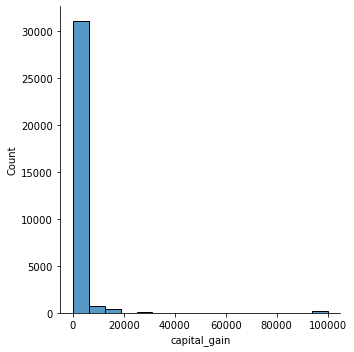

In [313]:
salary_data['capital_gain'], sns.displot(salary_data.capital_gain)


C:\Users\ramch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital_gain'>

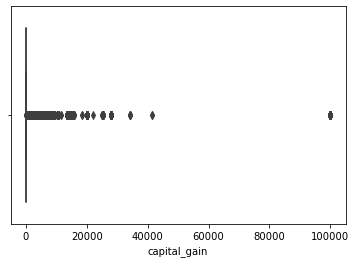

In [314]:
 sns.boxplot(salary_data.capital_gain)

In [315]:
salary_data.capital_gain = np.where(salary_data.capital_gain == 0, np.nan, salary_data.capital_gain)
salary_data.capital_gain

0         2174.0
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
32556        NaN
32557        NaN
32558        NaN
32559        NaN
32560    15024.0
Name: capital_gain, Length: 32561, dtype: float64

In [316]:
salary_data.capital_gain = np.log(salary_data.capital_gain)
salary_data.capital_gain

0        7.684324
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
32556         NaN
32557         NaN
32558         NaN
32559         NaN
32560    9.617404
Name: capital_gain, Length: 32561, dtype: float64

C:\Users\ramch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0        7.684324
 1        0.000000
 2        0.000000
 3        0.000000
 4        0.000000
            ...   
 32556    0.000000
 32557    0.000000
 32558    0.000000
 32559    0.000000
 32560    9.617404
 Name: capital_gain, Length: 32561, dtype: float64,
 <AxesSubplot:xlabel='capital_gain'>)

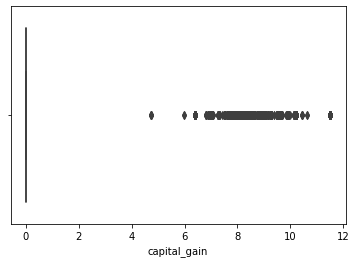

In [317]:
salary_data.capital_gain = salary_data.capital_gain.replace(np.nan, 0)
salary_data.capital_gain, sns.boxplot(salary_data.capital_gain)

In [318]:
salary_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0,40,Cuba,<=50K


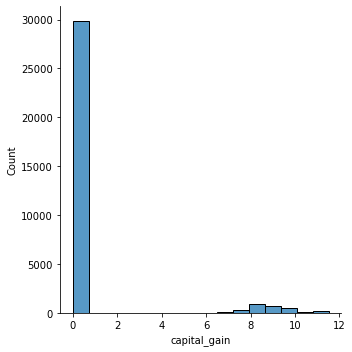

In [319]:
sns.displot(salary_data.capital_gain)

In [320]:
salary_data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,0.734601,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,2.454680,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,11.512915,4356.000000,99.000000


In [321]:
salary_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [322]:
salary_data.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

# Removing outliers from hours_per_week column


In [323]:
salary_data.hours_per_week

0        40
1        13
2        40
3        40
4        40
         ..
32556    38
32557    40
32558    40
32559    20
32560    40
Name: hours_per_week, Length: 32561, dtype: int64

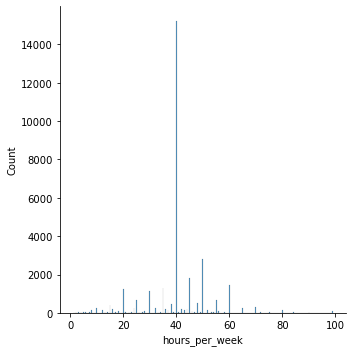

In [324]:
sns.displot(salary_data, x = 'hours_per_week')

C:\Users\ramch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours_per_week'>

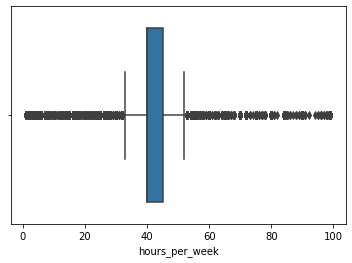

In [325]:
sns.boxplot(salary_data.hours_per_week)

In [326]:
salary_data.hours_per_week.quantile(0.75), salary_data.hours_per_week.quantile(0.25)

(45.0, 40.0)

In [327]:
salary_data.hours_per_week.quantile([0.25, 0.75])

0.25    40.0
0.75    45.0
Name: hours_per_week, dtype: float64

In [328]:
IQR = salary_data.hours_per_week.quantile(0.75) - salary_data.hours_per_week.quantile(0.25)
IQR

5.0

In [329]:
lower_range = salary_data.hours_per_week.quantile(0.25) - (1.5 * IQR)
upper_range = salary_data.hours_per_week.quantile(0.75) + (1.5 * IQR)

lower_range, upper_range

(32.5, 52.5)

In [330]:
salary_data.loc[salary_data.hours_per_week <= lower_range, 'hours_per_week'] = lower_range

In [331]:
salary_data.loc[salary_data.hours_per_week >= upper_range, 'hours_per_week'] = upper_range

C:\Users\ramch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours_per_week'>

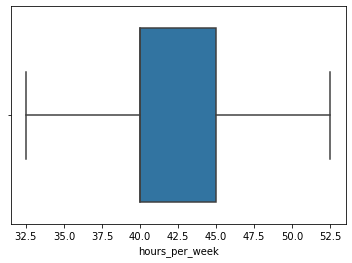

In [332]:
sns.boxplot(salary_data.hours_per_week)


# Removing outliers from education_num

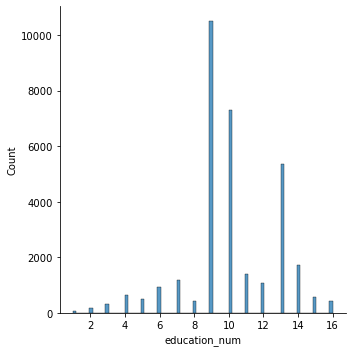

In [333]:
sns.displot(salary_data['education_num'])

C:\Users\ramch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_num'>

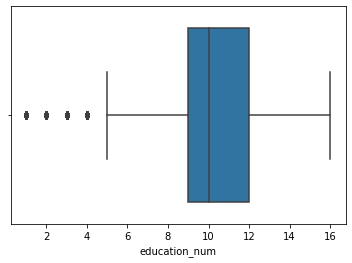

In [334]:
sns.boxplot(salary_data.education_num)

In [335]:
IQR = salary_data['education_num'].quantile(0.75) - salary_data['education_num'].quantile(0.25)
    
lower_range = salary_data['education_num'].quantile(0.25) - (1.5 * IQR)
upper_range = salary_data['education_num'].quantile(0.75) + (1.5 * IQR)
    
salary_data.loc[salary_data['education_num'] <= lower_range, 'education_num'] = lower_range
salary_data.loc[salary_data['education_num'] >= upper_range, 'education_num'] = upper_range

C:\Users\ramch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_num'>

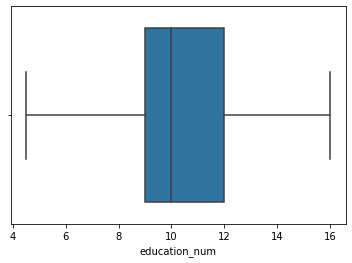

In [336]:
sns.boxplot(salary_data.education_num)

# Removing outliers from capital_loss

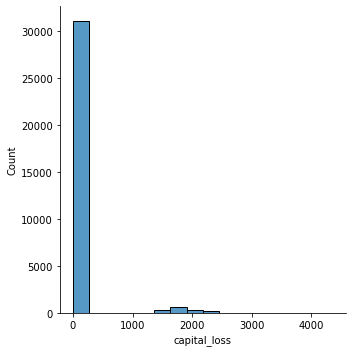

In [337]:
sns.displot(salary_data.capital_loss)

In [338]:
salary_data.capital_loss

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: capital_loss, Length: 32561, dtype: int64

In [339]:
salary_data.capital_loss = np.where(salary_data.capital_loss == 0, np.nan, salary_data.capital_loss)
salary_data.capital_loss = np.log(salary_data.capital_loss)
salary_data.capital_loss = salary_data.capital_loss.replace(np.nan, 0)

C:\Users\ramch\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital_loss', ylabel='Density'>

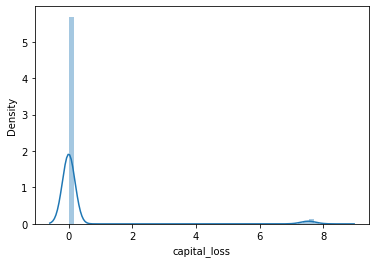

In [340]:
sns.distplot(salary_data.capital_loss)

C:\Users\ramch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital_loss'>

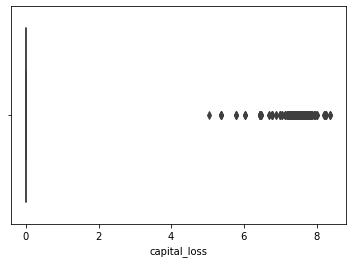

In [341]:
sns.boxplot(salary_data.capital_loss)

In [342]:
IQR = salary_data.capital_loss.quantile(0.75) - salary_data.capital_loss.quantile(0.25)
    
lower_range = salary_data.capital_loss.quantile(0.25) - (1.5 * IQR)
upper_range = salary_data.capital_loss.quantile(0.75) + (1.5 * IQR)
    
salary_data.loc[salary_data.capital_loss <= lower_range, 'capital_loss'] = lower_range
salary_data.loc[salary_data.capital_loss >= upper_range, 'capital_loss'] = upper_range

C:\Users\ramch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital_loss'>

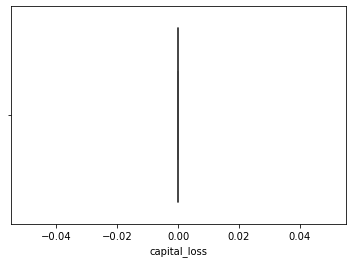

In [343]:
sns.boxplot(salary_data.capital_loss)

# Feature Engineering

In [344]:
salary_data.sex.unique()

array([' Male', ' Female'], dtype=object)

In [345]:
# Convert sex column as follows
# - male -> 1
# - else -> 0
salary_data.sex = np.where(salary_data.sex == "Male", 1, 0)

In [346]:
salary_data.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [347]:
# label encoding in race column
# {0: white, 1: black, 2: Asian-Pac-Islander, 3: Amer-Indian-Eskimo, 4: other
label_enco_race = {value: key for key, value in enumerate(salary_data.race.unique())}
label_enco_race

{' White': 0,
 ' Black': 1,
 ' Asian-Pac-Islander': 2,
 ' Amer-Indian-Eskimo': 3,
 ' Other': 4}

In [348]:
salary_data.race = salary_data.race.map(label_enco_race)
salary_data.race


0        0
1        0
2        0
3        1
4        1
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: race, Length: 32561, dtype: int64

In [349]:
salary_data.relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [350]:
## {0: ' Not-in-family',1: ' Husband'2: ' Wife',3: ' Own-child',4: ' Unmarried',5: ' Other-relative
label_enco_relationship = {value: key for key, value in enumerate(salary_data.relationship.unique())}
label_enco_relationship

{' Not-in-family': 0,
 ' Husband': 1,
 ' Wife': 2,
 ' Own-child': 3,
 ' Unmarried': 4,
 ' Other-relative': 5}

In [351]:
salary_data.relationship = salary_data.relationship.map(label_enco_relationship)
salary_data.relationship

0        0
1        1
2        0
3        1
4        2
        ..
32556    2
32557    1
32558    4
32559    3
32560    2
Name: relationship, Length: 32561, dtype: int64

In [352]:
salary_data.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [353]:
label_enco_occupation = {value: key for key, value in enumerate(salary_data.occupation.unique())}
label_enco_occupation

{' Adm-clerical': 0,
 ' Exec-managerial': 1,
 ' Handlers-cleaners': 2,
 ' Prof-specialty': 3,
 ' Other-service': 4,
 ' Sales': 5,
 ' Craft-repair': 6,
 ' Transport-moving': 7,
 ' Farming-fishing': 8,
 ' Machine-op-inspct': 9,
 ' Tech-support': 10,
 ' ?': 11,
 ' Protective-serv': 12,
 ' Armed-Forces': 13,
 ' Priv-house-serv': 14}

In [354]:
salary_data.occupation = salary_data.occupation.map(label_enco_occupation)
salary_data.occupation

0         0
1         1
2         2
3         2
4         3
         ..
32556    10
32557     9
32558     0
32559     0
32560     1
Name: occupation, Length: 32561, dtype: int64

In [355]:
salary_data.marital_status.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [356]:
label_enco_marital_status = {value: key for key, value in enumerate(salary_data.marital_status.unique())}
label_enco_marital_status

{' Never-married': 0,
 ' Married-civ-spouse': 1,
 ' Divorced': 2,
 ' Married-spouse-absent': 3,
 ' Separated': 4,
 ' Married-AF-spouse': 5,
 ' Widowed': 6}

In [357]:
salary_data.marital_status = salary_data.marital_status.map(label_enco_marital_status)
salary_data.marital_status

0        0
1        1
2        2
3        1
4        1
        ..
32556    1
32557    1
32558    6
32559    0
32560    1
Name: marital_status, Length: 32561, dtype: int64

In [358]:
salary_data.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [359]:
label_enco_education = {value: key for key, value in enumerate(salary_data.education.unique()) }
label_enco_education

{' Bachelors': 0,
 ' HS-grad': 1,
 ' 11th': 2,
 ' Masters': 3,
 ' 9th': 4,
 ' Some-college': 5,
 ' Assoc-acdm': 6,
 ' Assoc-voc': 7,
 ' 7th-8th': 8,
 ' Doctorate': 9,
 ' Prof-school': 10,
 ' 5th-6th': 11,
 ' 10th': 12,
 ' 1st-4th': 13,
 ' Preschool': 14,
 ' 12th': 15}

In [360]:
salary_data.education = salary_data.education.map(label_enco_education)
salary_data.education

0        0
1        0
2        1
3        2
4        0
        ..
32556    6
32557    1
32558    1
32559    1
32560    1
Name: education, Length: 32561, dtype: int64

In [361]:
salary_data.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [362]:
salary_data.workclass = np.where(salary_data.workclass == ' ?', ' Missing', salary_data.workclass)
salary_data.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Missing', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [363]:
label_enco_workclass = {value: key for key, value in enumerate(salary_data.workclass.unique())}
label_enco_workclass

{' State-gov': 0,
 ' Self-emp-not-inc': 1,
 ' Private': 2,
 ' Federal-gov': 3,
 ' Local-gov': 4,
 ' Missing': 5,
 ' Self-emp-inc': 6,
 ' Without-pay': 7,
 ' Never-worked': 8}

In [365]:
salary_data.workclass = salary_data.workclass.map(label_enco_workclass)
salary_data.workclass

0        0
1        1
2        2
3        2
4        2
        ..
32556    2
32557    2
32558    2
32559    2
32560    6
Name: workclass, Length: 32561, dtype: int64

In [366]:
salary_data.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [367]:
label_enco_country = {value: key for key, value in enumerate(salary_data.native_country.unique())}
label_enco_country

{' United-States': 0,
 ' Cuba': 1,
 ' Jamaica': 2,
 ' India': 3,
 ' ?': 4,
 ' Mexico': 5,
 ' South': 6,
 ' Puerto-Rico': 7,
 ' Honduras': 8,
 ' England': 9,
 ' Canada': 10,
 ' Germany': 11,
 ' Iran': 12,
 ' Philippines': 13,
 ' Italy': 14,
 ' Poland': 15,
 ' Columbia': 16,
 ' Cambodia': 17,
 ' Thailand': 18,
 ' Ecuador': 19,
 ' Laos': 20,
 ' Taiwan': 21,
 ' Haiti': 22,
 ' Portugal': 23,
 ' Dominican-Republic': 24,
 ' El-Salvador': 25,
 ' France': 26,
 ' Guatemala': 27,
 ' China': 28,
 ' Japan': 29,
 ' Yugoslavia': 30,
 ' Peru': 31,
 ' Outlying-US(Guam-USVI-etc)': 32,
 ' Scotland': 33,
 ' Trinadad&Tobago': 34,
 ' Greece': 35,
 ' Nicaragua': 36,
 ' Vietnam': 37,
 ' Hong': 38,
 ' Ireland': 39,
 ' Hungary': 40,
 ' Holand-Netherlands': 41}

In [368]:
salary_data.native_country = salary_data.native_country.map(label_enco_country)
salary_data.native_country.head()

0    0
1    0
2    0
3    0
4    1
Name: native_country, dtype: int64

<AxesSubplot:>

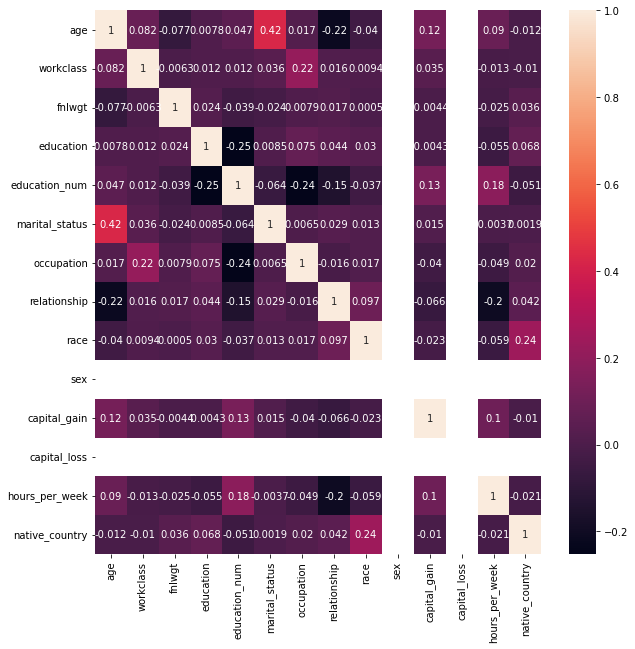

In [369]:
plt.figure(figsize = (10, 10))
corr = salary_data.corr()
sns.heatmap(corr, annot = True)